In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import pandas as pd 
from matplotlib.image import imread
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Dropout,Flatten
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing import image
import tensorflow as tf

In [2]:
data='F:\CNN'

In [3]:
os.listdir(data)

['kk', 'test', 'train']

In [4]:
test_path=data+'\\test'
train_path=data+'\\train'

In [5]:
new=test_path+'\\happy'+'\\download.jpg'

In [6]:
imread(new).shape

(279, 181, 3)

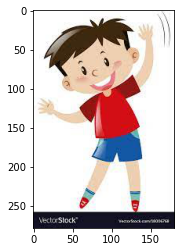

In [7]:
plt.imshow(imread(new))

In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [9]:
image_gen=ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.1,
    height_shift_range=0.1,
    fill_mode='nearest',
    rescale=1/255)

In [10]:
model=Sequential([
    Conv2D(80,kernel_size=(3,3),input_shape=(200,200,3),activation='relu'),
    MaxPool2D(2,2),
    Flatten(),
    Dense(130,activation='relu'),
    Dropout(0.5),
    Dense(1,activation='sigmoid')
    
])
model.compile(loss='binary_crossentropy',optimizer='adam' ,metrics=['accuracy'])

In [11]:
early=EarlyStopping(monitor='val_loss',mode='min',patience=2)

In [12]:
test_image_gen=image_gen.flow_from_directory(test_path,target_size=(200,200),color_mode='rgb',class_mode='binary')
train_image_gen=image_gen.flow_from_directory(train_path,target_size=(200,200),color_mode='rgb',class_mode='binary')

Found 13 images belonging to 2 classes.
Found 52 images belonging to 2 classes.


In [13]:
model.fit_generator(train_image_gen,epochs=50,validation_data=(test_image_gen))

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/50
2/2 [==============================] - 1s 728ms/step - loss: 8.1801 - accuracy: 0.4423 - val_loss: 74.6369 - val_accuracy: 0.4615
Epoch 2/50
2/2 [==============================] - 1s 447ms/step - loss: 59.7322 - accuracy: 0.4615 - val_loss: 5.7888 - val_accuracy: 0.5385
Epoch 3/50
2/2 [==============================] - 1s 477ms/step - loss: 21.5212 - accuracy: 0.5769 - val_loss: 21.7257 - val_accuracy: 0.5385
Epoch 4/50
2/2 [==============================] - 1s 589ms/step - loss: 12.1463 - accuracy: 0.5385 - val_loss: 4.2421 - val_accuracy: 0.4615
Epoch 5/50
2/2 [==============================] - 1s 485ms/step - loss: 5.8304 - accuracy: 0.6154 - val_loss: 7.7838 - val_accuracy: 0.4615
Epoch 6/50
2/2 [==============================] - 1s 462ms/step - loss: 7.0059 - accuracy: 0.4615 - val_loss: 1.3829 - val_accuracy: 0.5385
Epoch 7/50
2/2 [==============================] - 1s 544ms/step - loss: 4.6160 

In [14]:
model.evaluate(test_image_gen)

1/1 [==============================] - 0s 0s/step - loss: 1.3701 - accuracy: 0.7692


[1.3700741529464722, 0.7692307829856873]

In [15]:
new=test_path+'\\happy'+'\\download.jpg'

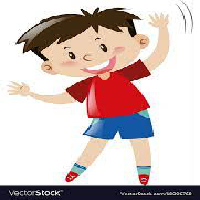

In [16]:
img=image.load_img(new,target_size=(200,200))
img

In [17]:
ima=image.img_to_array(img)

In [18]:
new_ima=ima.reshape(1,200,200,3)

In [19]:
model.predict(new_ima)

array([[0.]], dtype=float32)

In [20]:
new_data='F:\CNN'
imag=new_data+'\\kk'

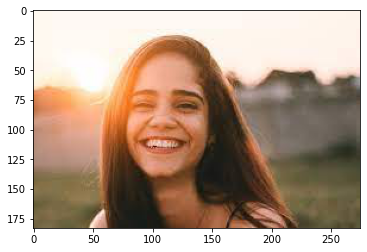

happy


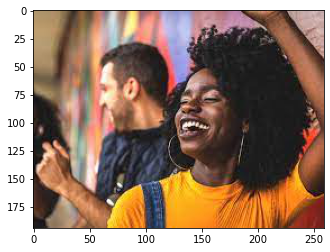

happy


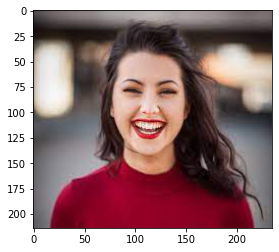

happy


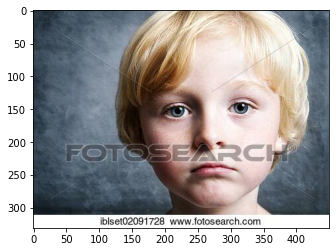

sad


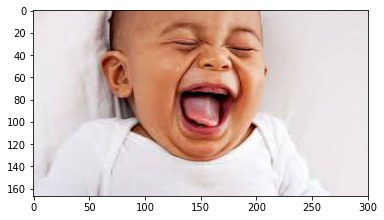

happy


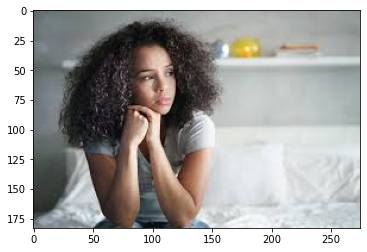

sad


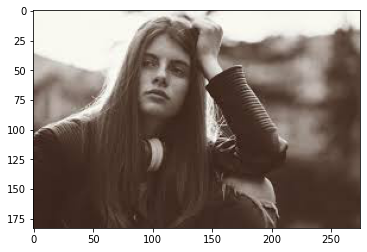

sad


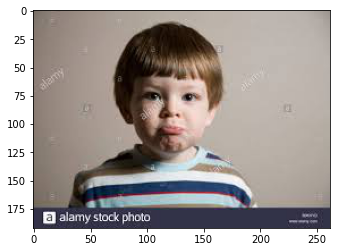

happy


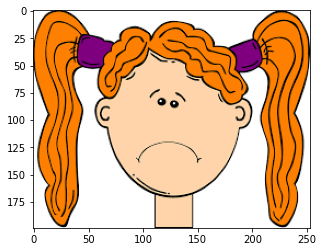

happy


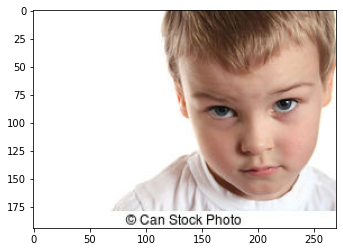

sad


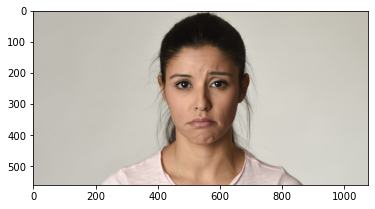

sad


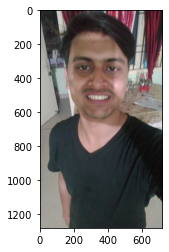

sad


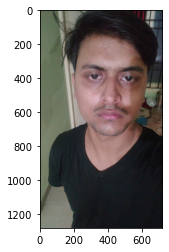

sad


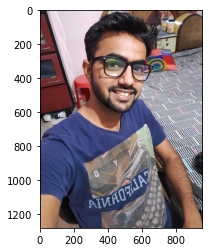

sad


In [21]:
for i in os.listdir(imag):
    img=image.load_img(new_data+'\\kk'+'\\'+i,target_size=(200,200))

    
    ima=image.img_to_array(img)
    new_ima=ima.reshape(1,200,200,3)
    if model.predict(new_ima)==np.array(0):
        
        plt.imshow(imread(new_data+'\\kk'+'\\'+i))
        plt.show()
        print('happy')
    else:
        
        plt.imshow(imread(new_data+'\\kk'+'\\'+i))
        plt.show()
        print('sad')